<a href="https://colab.research.google.com/github/ekolonsky/yulia_zuk/blob/main/YZ_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка библиотек

In [ ]:
# Установим библиотеку для анализа текстов NLTK
!pip install nltk
# Библиотека для морфологического анализа
!pip install pymorphy2

     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 8.2 MB 16.8 MB/s 


## Загрузка и очистка корпуса слов

In [ ]:
import base64
import requests

# загружаем тексты песен (корпус)
req = requests.get("https://raw.githubusercontent.com/ekolonsky/yulia_zuk/main/yz_songs.txt")
corpus = req.text

In [ ]:
corpus

">> 'В черном  ящике' \n\n'На холстах и на листочках В виде слов и ярких точек Весь разложен на кусочки Нас пугает и смешит Он совсем иначе соткан\xa0 Из изменчивых волок...'\n\n>> 'Богу' \n\n'Плещет холодным неоном в проеме штор,\xa0 И рассыпает реклама свои пророчества…\xa0 Манной небесной падет электронный шторм,\xa0 Все переменит и боль...'\n\n>> 'Каю' \n\n'\xa0Я опоздала? Нету пути назад?\xa0 Как я теперь останусь без теплых мечт. Хоть на минутку сделал бы вид, что рад, Спрятал клыки и когти, убрал б...'\n\n>> 'Если бы мы хотели вместе не умирать' \n\n'Если бы мы хотели вместе не умирать Просто держаться за руки бесконечно Если бы центром жизни была кровать В распоряжении - вечность Если б ...'\n\n>> 'Сонет № 15 И снова в наш город вернулась полярная ночь' \n\n'\xa0И снова в наш город вернулась полярная ночь:\xa0 \xa0Контрастнее тени и ярче слепые огни...\xa0 \xa0И нам не помогут, мы сами не сможем помочь,\xa0 \xa0Мы бу...'\n\n>> 'Измерение осени' \n\n'\xa0Измеряя сравниваем с мер

In [ ]:
# очищаем от знаков препинания
import string

spec_chars = string.punctuation + '\xa0«»\t—…' 

def remove_chars_from_text(text, chars):
    return "".join([ch.lower() for ch in text if ch not in chars])

corpus = remove_chars_from_text(corpus, spec_chars)

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='ru')

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
russian_stopwords = stopwords.words("russian")  # союзы, междометия
russian_stopwords.extend(['что-то', 'свой','словно','который','пусть','наш','чтоть', 'всё','это', 'весь','ещё', 'ах',\
                          'твой','ваш','её','его', '\xa0'])

In [ ]:
# Разбиваем текст на слова
tokens = word_tokenize(corpus)
# Отбираем существительные, прилагательные и глаголы
tokens = [w for w in tokens if morph.parse(w)[0].tag.POS in ['NOUN', 'ADJF','VERB']]
# приводим слова к нормальной форме, чтобы считать одним словом разные его числа, лица, падежи, склонения
tokens = [morph.parse(w)[0].normal_form for w in tokens]
# исключаем стоп-слова
tokens = [w for w in tokens if w not in russian_stopwords]

## Частотный анализ

In [ ]:
 # Выполняем частотный анализ
from nltk.probability import FreqDist
text_tokens = nltk.Text(tokens)
fdist = FreqDist(text_tokens)

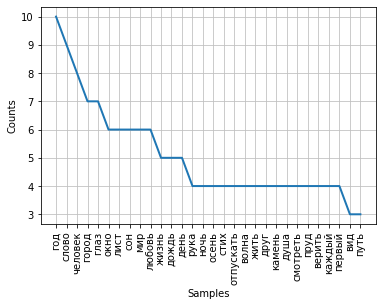

In [ ]:
# Графическое представление
fdist.plot(30,cumulative=False)

In [ ]:
from collections import Counter

def unique(list):
  return len(Counter(list).keys())

In [ ]:
# Разбиваем текст на слова
tokens = word_tokenize(corpus)
print('Корпус слов: ', len(tokens))

Корпус слов:  2198


In [ ]:
def stats(pos=['NOUN','ADJF','VERB']):
  # Отбираем прилагательные
  tokens_pos = [w for w in tokens if morph.parse(w)[0].tag.POS in pos]
  print(pos, len(tokens_pos))
  print('Разных', unique(tokens_pos))
  # приводим слова к нормальной форме, чтобы считать одним словом разные его числа, лица, падежи, склонения
  tokens_pos_n = [morph.parse(w)[0].normal_form for w in tokens_pos]
  print('После нормализации: ', unique(tokens_pos_n))
  # исключаем стоп-слова
  tokens_pos_ns = [w for w in tokens_pos_n if w not in russian_stopwords]
  print('Без стоп-слов: ', unique(tokens_pos_ns))
  return FreqDist(nltk.Text(tokens_pos_ns)).most_common(10)

In [ ]:
stats()

['NOUN', 'ADJF', 'VERB'] 1093
Разных 893
После нормализации:  732
Без стоп-слов:  719


[('год', 10),
 ('слово', 9),
 ('человек', 8),
 ('город', 7),
 ('глаз', 7),
 ('окно', 6),
 ('лист', 6),
 ('сон', 6),
 ('мир', 6),
 ('любовь', 6)]

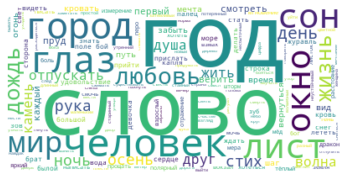

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color="white").generate(" ".join(text_tokens))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()